Matplotlib is building the font cache; this may take a moment.


   idade  tempo_contrato  uso_mensal  suporte_chamados  cancelou
0     18              14           1                10         1
1     53               1          11                 8         0
2     48              13          20                 0         0
3     20              17          22                 0         0
4     65               3          30                 4         1
Acuracia com k-1: 0.8
Acuracia com k-3: 0.76
Acuracia com k-5: 0.76
Acuracia com k-7: 0.74
Acuracia com k-9: 0.77

 Resumo de Acuracia por K: 
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
O Valor de K com a melhor acuracia foi: 1
O modelo errava mais quando o valor de K era maior
O valor de K é oque define o quanto ele vai considerar os vizinhos, se colocar um valor baixo ele ira considerar menos os vizinhos, porem se tornara mais instavel, ao colocar um valor alto ele cosiderar mais os vizinhos, fazendo com que a acuracia seja menor porem mais confiavel e estavel

Para resumir, o K alto

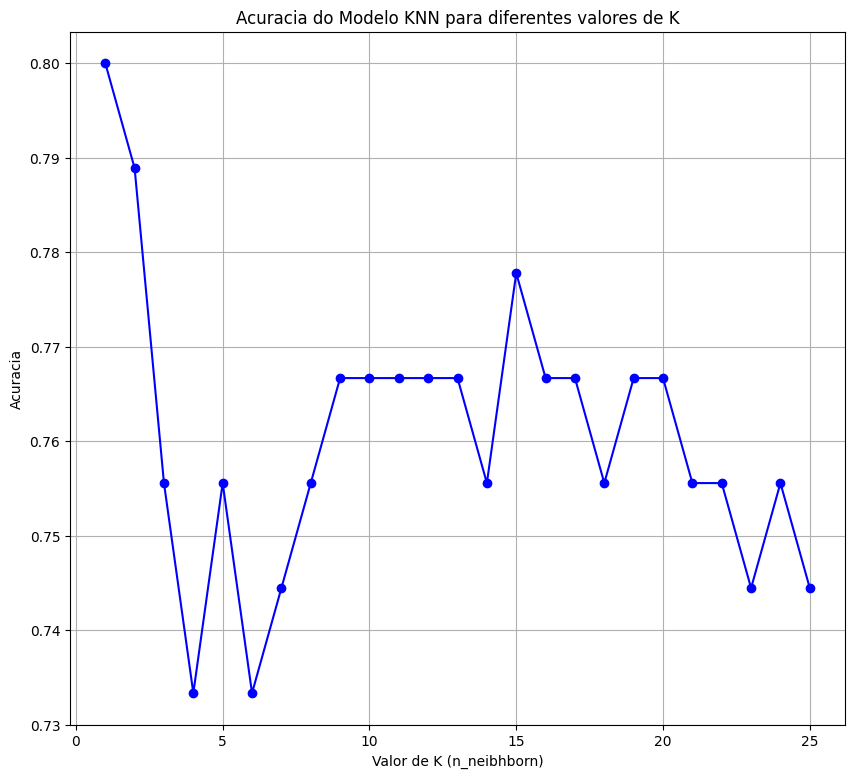


O melhor valor de k encontrado foi: 1 com acurácia de 0.8000
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
O desempenho variou em pequenos valores, variou em ate 0,06
O melhor valor de k encontrado foi 1
Eu não escolheria o valor com o menor K, por ele somente procurar o valor do vizinho mais proximo, ele não considera os outros que podem influenciar, talvez um valor entre 3 e 5


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Carregar o dataset no Python (atv 1 e 2)

df = pd.read_csv ("churn_dataset.csv")

print(df.head())

#separar as variaveis (atv 1)
x = df.drop('cancelou', axis=1)
y = df['cancelou']

# test.size=Quantidade de dados para teste, restante ate completar 1 vai para treino
# random_state=semente de aleatoridade, 42 é o valor comum da ocmunidade para garantir reprodutibilidade
# train_test_split=escolhe aleatoriamente os dados que vão para teste e para treino 

# x=dados de entrada
# y=rotulos de saida

#Separar os dados de treino em 30% de teste e 70% de treino (atv 1, 2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit (x_train, y_train)

y_pred=knn.predict(x_test)

accuracy = accuracy_score (y_test,y_pred)

#testar diferentes valores(atv 1)
k_values = [1,3,5,7,9]
results={}

#treinar o modelo usando o n_neighbors(atv 1)
for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    #avaliar o modelo calculando a acuracia(atv 1)
    acc=accuracy_score(y_test,preds)
    results[k]=acc
    print(f'Acuracia com k-{k}: {acc:.2}')

print('\n Resumo de Acuracia por K: ')


print('=-'*30)
print('O Valor de K com a melhor acuracia foi: 1')
print('O modelo errava mais quando o valor de K era maior')
print('O valor de K é oque define o quanto ele vai considerar os vizinhos, se colocar um valor baixo ele ira considerar menos os vizinhos, porem se tornara mais instavel, ao colocar um valor alto ele cosiderar mais os vizinhos, fazendo com que a acuracia seja menor porem mais confiavel e estavel')

print('\nPara resumir, o K alto ele considera a opinião da maioria por assim dizer, o K menor considera somente oque ele pensou')

#ATIVIDADE 2
#ATIVIDADE 2
#ATIVIDADE 2

print('=-'*60)
print('\nAtividade 2')

#treinar o modelo com valores de 1 a 25(atv 2)
k_values=range(1,26)
acuracia=[]
#registra a acuracia de cada execução
for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    acc=accuracy_score(y_test,preds)
    acuracia.append(acc)

    print(f'Acuracia com k={k}: {acc:.2}')

#construir o grafico (atv 2)
plt.figure(figsize=(10,9))
plt.plot(k_values, acuracia, marker='o', linestyle='-', color='b')
plt.title('Acuracia do Modelo KNN para diferentes valores de K')
plt.xlabel('Valor de K (n_neibhborn)')
plt.ylabel('Acuracia')
plt.xticks=(k_values)
plt.grid(True)
plt.show()

#identificar qual valor de k foi o melhor(atv 2)
best_k=k_values[acuracia.index(max(acuracia))]
best_acuracia=max(acuracia)

print(f'\nO melhor valor de k encontrado foi: {best_k} com acurácia de {best_acuracia:.4f}')

print('=-'*30)

print('O desempenho variou em pequenos valores, variou em ate 0,06')
print('O melhor valor de k encontrado foi 1')
print('Eu não escolheria o valor com o menor K, por ele somente procurar o valor do vizinho mais proximo, ele não considera os outros que podem influenciar, talvez um valor entre 3 e 5')


